In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import os

In [2]:
# Initialize the EasyOCR reader for English
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
# Load your manga image (update path as needed)
image_path = '/home/daniel/Desktop/op_reader/TEST.jpg'

# Verify image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

# Read image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Could not read the image file")

# Convert to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# Perform OCR with adjusted parameters for manga text
results = reader.readtext(image_path,
                        text_threshold=0.7,
                        low_text=0.4,
                        link_threshold=0.4,
                        mag_ratio=1.5)

# Create a copy for drawing
output_image = image.copy()

# Draw bounding boxes and text
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    # Draw rectangle
    cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)
    
    # Draw text background
    text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0]
    cv2.rectangle(output_image, 
                 (top_left[0], top_left[1] - text_size[1] - 10),
                 (top_left[0] + text_size[0], top_left[1] - 10),
                 (0, 255, 0), -1)
    
    # Draw text
    cv2.putText(output_image, text, (top_left[0], top_left[1] - 10), 
               cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)

# Convert to RGB for display
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

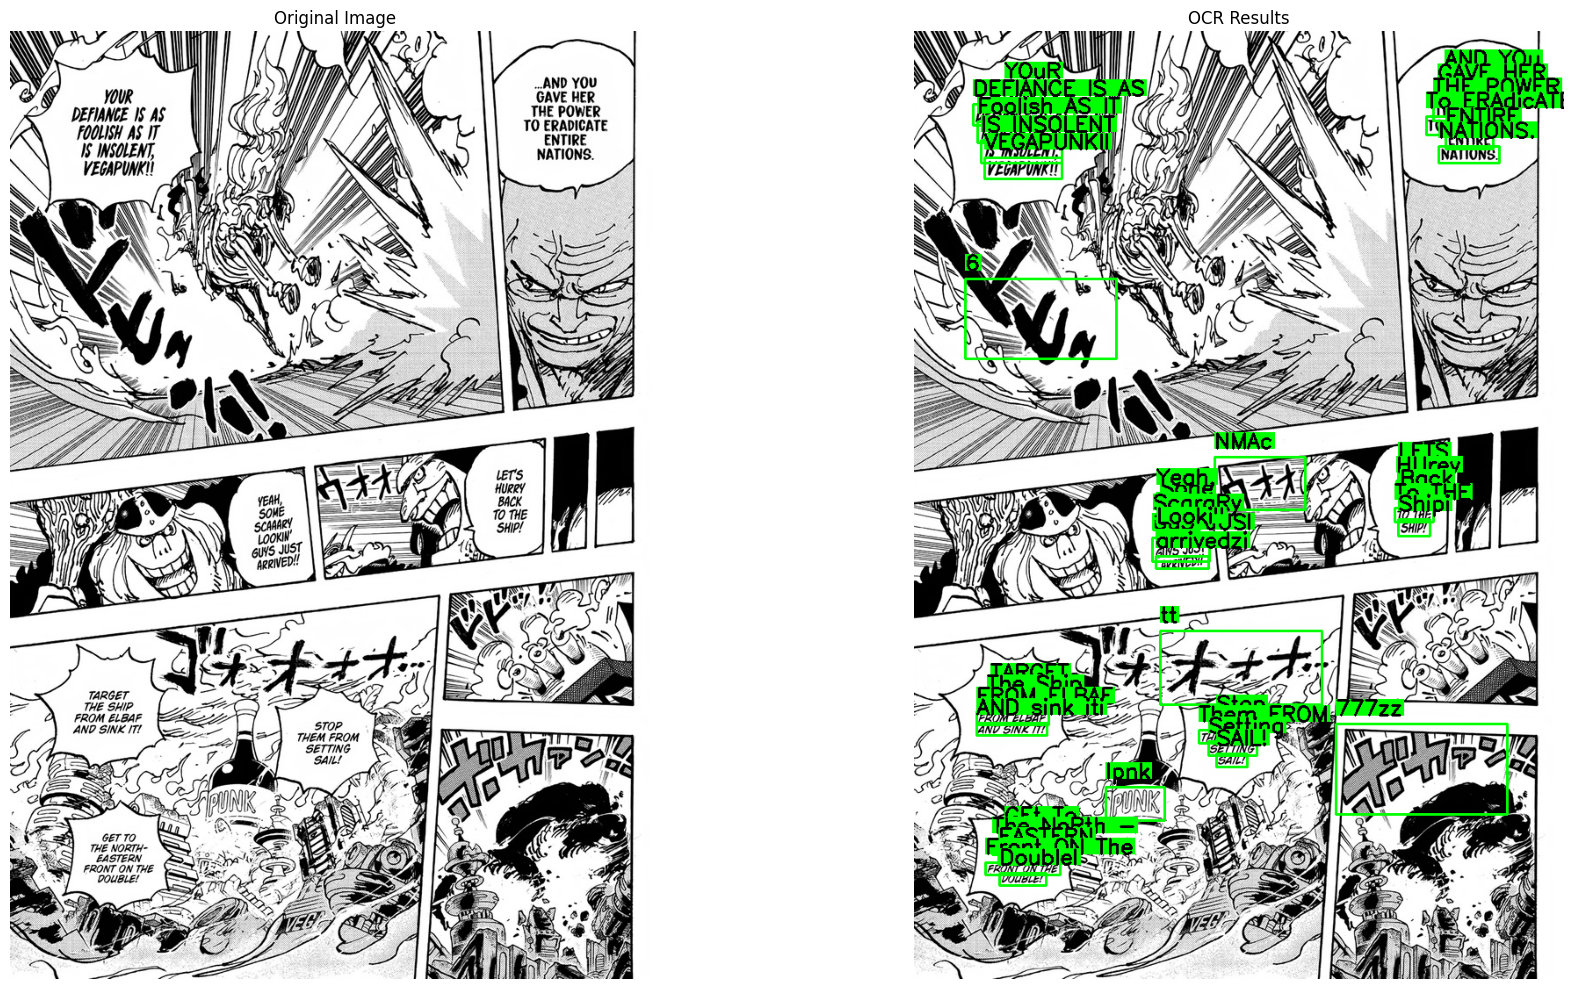

In [ ]:
# Create a figure with two subplots
plt.figure(figsize=(20, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Processed image with OCR results
plt.subplot(1, 2, 2)
plt.imshow(output_image_rgb)
plt.title('OCR Results')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Print extracted text with formatting
print("\nExtracted Text:")
print("-" * 50)
for i, (_, text, prob) in enumerate(results, 1):
    print(f"{i}. {text} (confidence: {prob:.2%})")
print("-" * 50)
print(f"\nTotal text blocks detected: {len(results)}")


Extracted Text:
--------------------------------------------------
1. AND YOu (confidence: 41.08%)
2. YOuR (confidence: 45.04%)
3. GAVE HER (confidence: 69.46%)
4. DEFIANCE IS AS (confidence: 60.28%)
5. THE POWER (confidence: 55.69%)
6. Foolish AS IT (confidence: 46.84%)
7. To ERAdicATE (confidence: 14.81%)
8. ENTIRE (confidence: 99.20%)
9. IS INSOLENT (confidence: 52.11%)
10. NATIONS. (confidence: 82.89%)
11. VEGAPUNKII (confidence: 85.35%)
12. LETS (confidence: 55.36%)
13. NMAc (confidence: 5.37%)
14. HUrey (confidence: 32.96%)
15. Back (confidence: 54.86%)
16. Sohe (confidence: 55.35%)
17. To THE (confidence: 42.44%)
18. Shipi (confidence: 32.42%)
19. Gu5 JUSI (confidence: 21.26%)
20. TARGET (confidence: 99.33%)
21. tt (confidence: 2.20%)
22. The Ship (confidence: 42.00%)
23. FROM ELBAF (confidence: 46.28%)
24. AND sink iti (confidence: 40.35%)
25. Stop (confidence: 89.92%)
26. Them FROM (confidence: 50.76%)
27. Setting (confidence: 96.22%)
28. SAIL! (confidence: 76.85%)
29. Ipnk (

In [ ]:
# Save the processed image
# output_path = os.path.join(os.path.dirname(image_path), 'processed_' + os.path.basename(image_path))
# cv2.imwrite(output_path, cv2.cvtColor(output_image_rgb, cv2.COLOR_RGB2BGR))
# print(f"\nProcessed image saved to: {output_path}")


Processed image saved to: /home/daniel/Desktop/op_reader/processed_TEST.jpg
